In [13]:
%matplotlib widget

In [14]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Alternative data analysis using Pandas, Plotly and Scipy

use *glob* to find xy files

In [15]:
files = glob.glob("*.xy")

In [16]:
files[0]

'23-019-AG_2thomscan long scan_exported.xy'

we will use the file '23-019-AG_2thomscan long scan_exported.xy' for the analysis below!

read file with pandas and create a *dataframe*

In [17]:
col_names=["x","intensity"]
dataframe_with_xy_data=pd.read_csv(files[0],skiprows=1, sep=" ",names=col_names)

plot the data from the dataframe using *plotly*

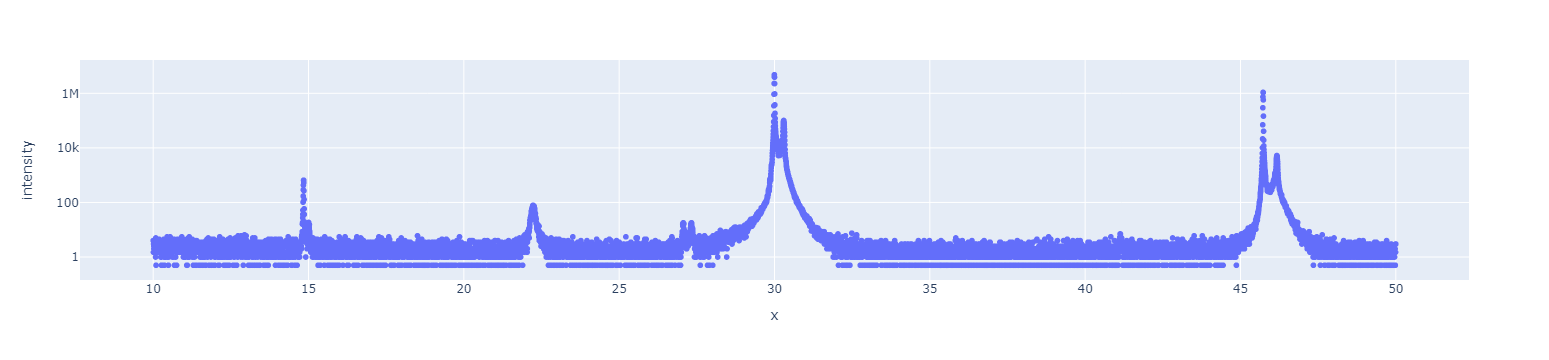

In [18]:
fig = px.scatter(data_frame=dataframe_with_xy_data, x="x", y="intensity",log_y=True)
fig.show()

choose the region of interst by filtering/masking the data:

In [19]:
masked_df=dataframe_with_xy_data[(dataframe_with_xy_data["x"]>45)&(dataframe_with_xy_data["x"]<47)]

Plot the data by using Plotly Express, which is super simple to apply on Pandas DataFrames

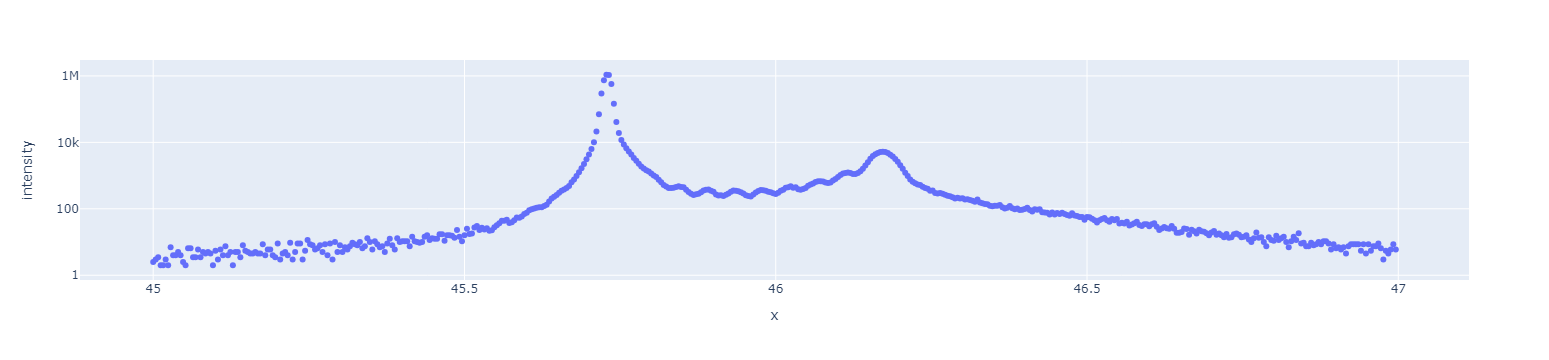

In [20]:
fig2 = px.scatter(data_frame=masked_df, x="x", y="intensity",log_y=True, )

fig2.show()

In [21]:
masked_df.describe()

,x,intensity
count,500.000000,5.000000e+02
mean,45.998002,8.518334e+03
std,0.577927,8.077482e+04
min,45.000002,2.000000e+00
25%,45.499002,9.000000e+00
50%,45.998002,3.775000e+01
75%,46.497002,3.267500e+02
max,46.996002,1.083806e+06


Find the maximum peak

In [22]:
masked_df[masked_df["intensity"] == masked_df["intensity"].max()].x

8932    45.728002
Name: x, dtype: float64

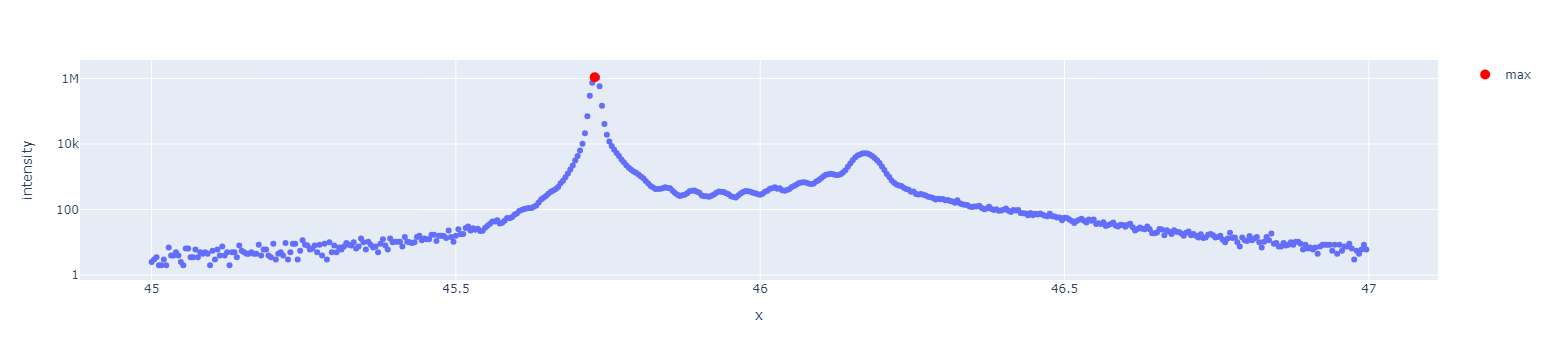

In [23]:
trace_max = go.Scatter(x=masked_df[masked_df["intensity"] == masked_df["intensity"].max()].x, y=masked_df[masked_df["intensity"] == masked_df["intensity"].max()].intensity, mode='markers', name='max', marker=dict(color='red', size=10))
fig.update_traces( showlegend=True)
# Update the figure with the new trace
fig2.add_trace(trace_max)

# Show the updated figure
fig2.show()

# Peak finding using SciPy 

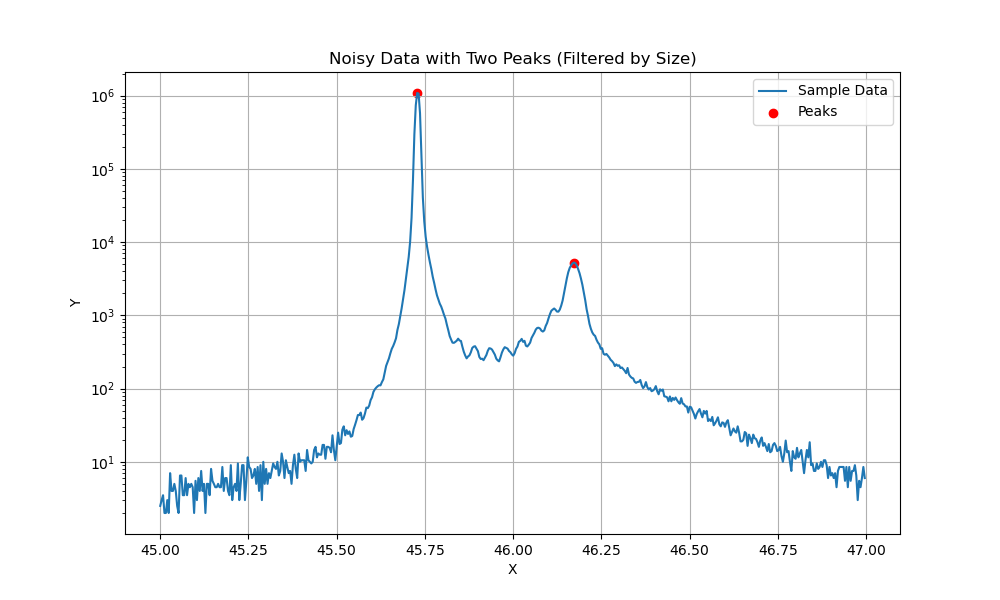

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Create some noisy data with two peaks
x = masked_df["x"].values
y = masked_df["intensity"].values

# Find peaks in the data based on peak size (amplitude)
peaks, _ = find_peaks(y, height=0, threshold=100.0)  # Adjust threshold as needed

# Filter the detected peaks to ensure only two are selected
#if len(peaks) == 2:
    # Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sample Data')
plt.scatter(x[peaks], y[peaks], color='red', marker='o', label='Peaks')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Noisy Data with Two Peaks (Filtered by Size)')
plt.grid(True)
plt.yscale("log")
plt.show()
#else:
 #   print("Exactly two peaks were not found.")
